### Import Block

In [40]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from library import HashFunction

### Data loading

Train and Test sets can be found in the `Resources` folder. You can choose to visualize your data all at once, in windows, or only considering a subset of sensors to detect which ones would prove most useful to your analysis.
An example of such a visualization can be found in the following cell.

In [4]:
train_file_path = 'lab2_train.csv'

train_data = pd.read_csv(train_file_path, delimiter=',')

### Familiarization

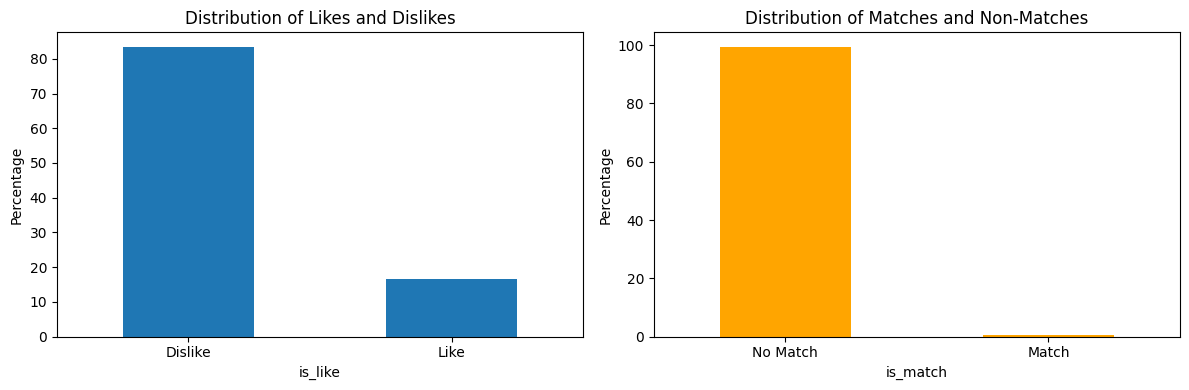

In [5]:
like_counts = train_data['is_like'].value_counts(normalize=True) * 100
match_counts = train_data['is_match'].value_counts(normalize=True) * 100

# Plot the distribution of likes and dislikes
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
like_counts.plot(kind='bar', rot=0)
plt.title('Distribution of Likes and Dislikes')
plt.xlabel('is_like')
plt.ylabel('Percentage')
plt.xticks(range(len(like_counts.index)), ['Dislike', 'Like'])

# Plot the distribution of matches and non-matches
plt.subplot(1, 2, 2)
match_counts.plot(kind='bar', rot=0, color='orange')
plt.title('Distribution of Matches and Non-Matches')
plt.xlabel('is_match')
plt.ylabel('Percentage')
plt.xticks(range(len(match_counts.index)), ['No Match', 'Match'])

plt.tight_layout()
plt.show()

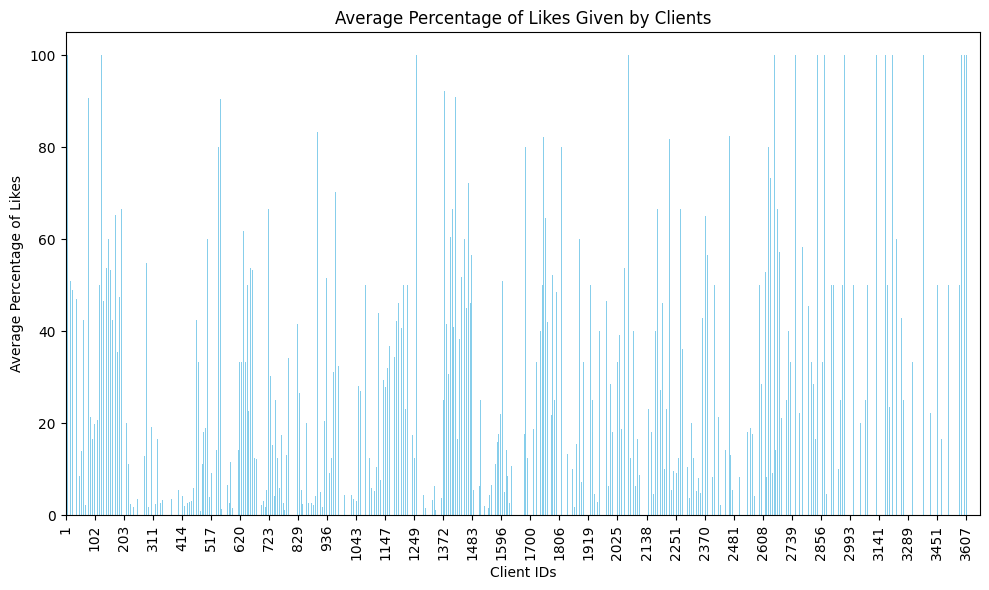

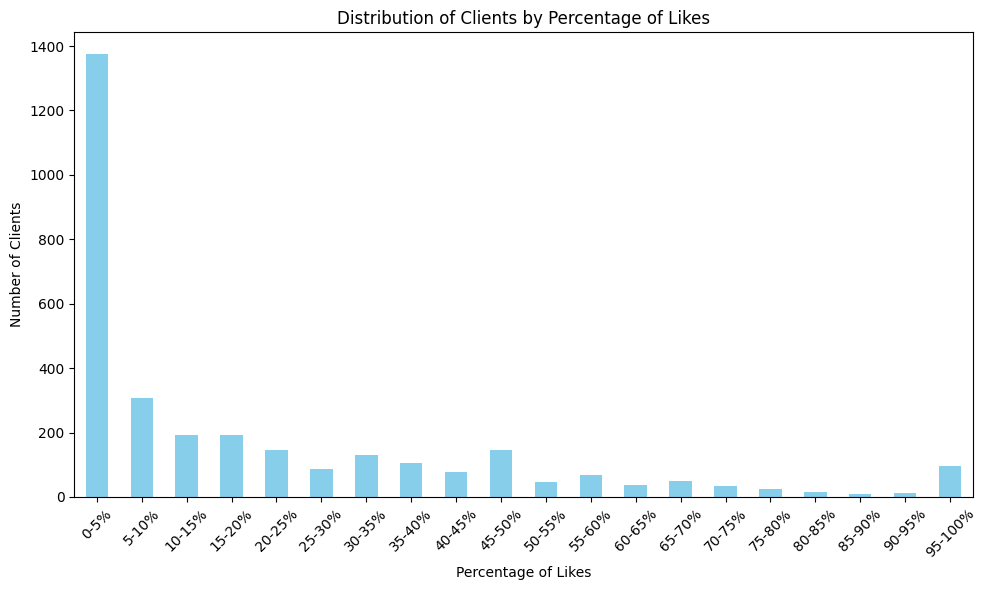

In [6]:
like_percentage = train_data.groupby('user_from_id')['is_like'].mean() * 100

# Plotting
plt.figure(figsize=(10, 6))
like_percentage.sort_index().plot(kind='bar', color='skyblue')

# Choose the step for x-axis labels
step = 100
plt.xticks(range(0, len(like_percentage), step), like_percentage.index[::step], rotation=90)

plt.title('Average Percentage of Likes Given by Clients')
plt.xlabel('Client IDs')
plt.ylabel('Average Percentage of Likes')
plt.tight_layout()
plt.show()

# Bin the percentages into 5% intervals
bins = range(0, 101, 5)
labels = [f'{i}-{i+5}%' for i in range(0, 100, 5)]
like_percentage['percentage_bins'] = pd.cut(like_percentage, bins=bins, labels=labels, include_lowest=True)

# Count the number of clients in each percentage bin
bin_counts = like_percentage['percentage_bins'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Clients by Percentage of Likes')
plt.xlabel('Percentage of Likes')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

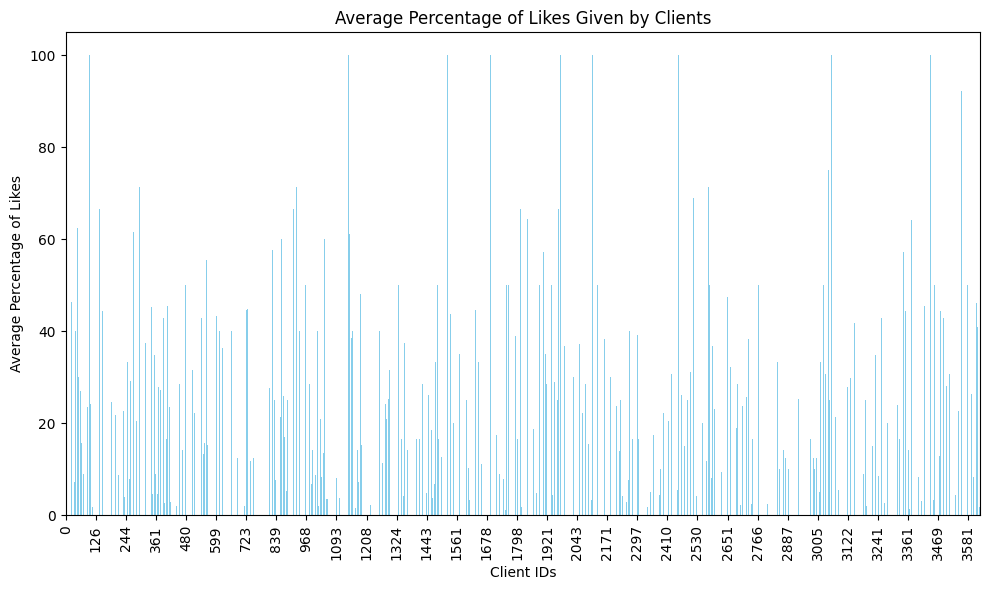

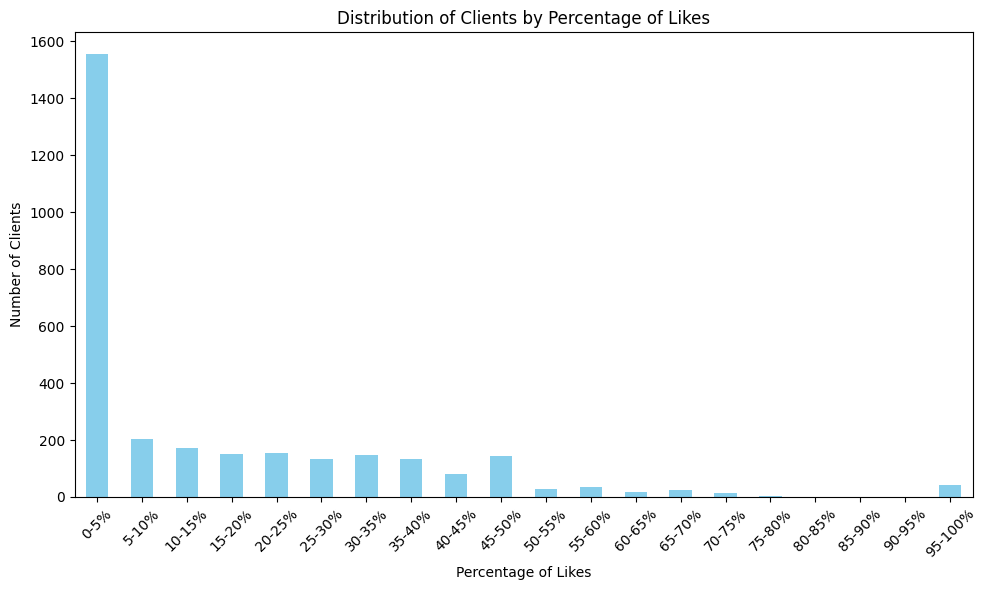

In [7]:
likes_received_percentage = train_data.groupby('user_to_id')['is_like'].mean() * 100

plt.figure(figsize=(10, 6))
likes_received_percentage.sort_index().plot(kind='bar', color='skyblue')
# Choose the step for x-axis labels
step = 100
plt.xticks(range(0, len(likes_received_percentage), step), likes_received_percentage.index[::step], rotation=90)

plt.title('Average Percentage of Likes received by Clients')
plt.xlabel('Client IDs')
plt.ylabel('Average Percentage of Likes')
plt.tight_layout()
plt.show()


# Bin the percentages into 5% intervals
bins = range(0, 101, 5)
labels = [f'{i}-{i+5}%' for i in range(0, 100, 5)]
likes_received_percentage['percentage_bins'] = pd.cut(likes_received_percentage, bins=bins, labels=labels, include_lowest=True)

# Count the number of clients in each percentage bin
bin_counts = likes_received_percentage['percentage_bins'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Clients by Percentage of Likes received')
plt.xlabel('Percentage of Likes')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

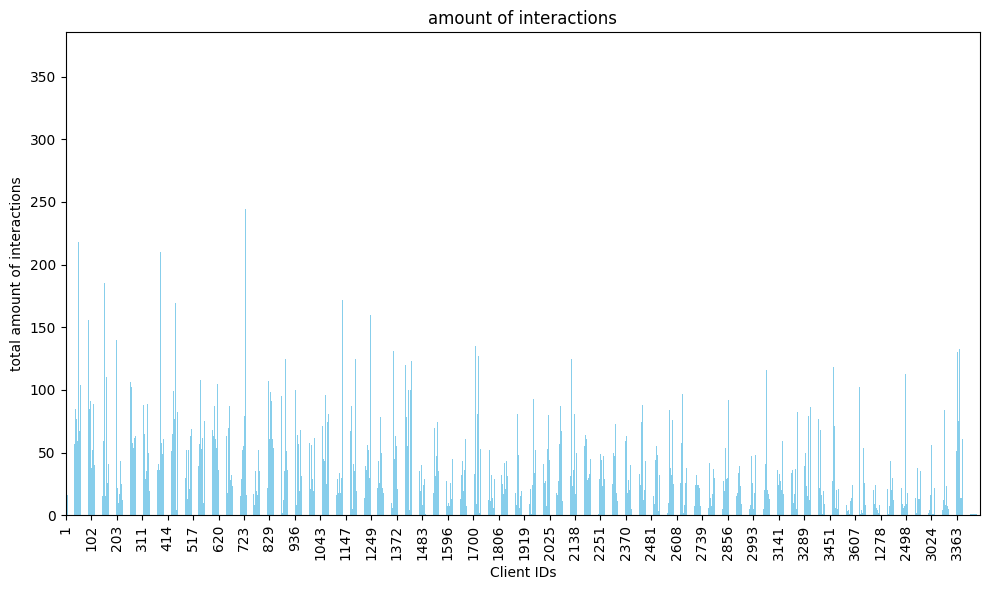

average amount of interactions: 42.54636591478697
-42.0 323.0


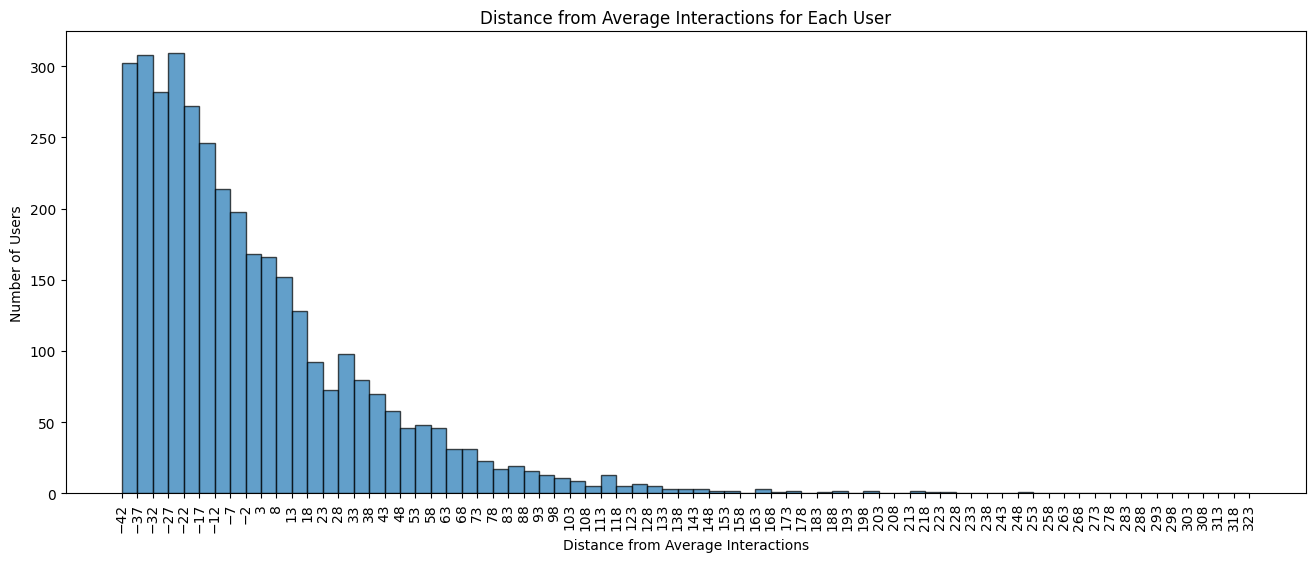

In [55]:
# Calculate the total amount of interactions for each client
amount_of_interactions =  pd.concat([train_data.groupby('user_from_id').size(), train_data.groupby('user_to_id').size()], axis=1, sort=False).sum(axis=1)


plt.figure(figsize=(10, 6))
amount_of_interactions.sort_index().plot(kind='bar', color='skyblue')
# Choose the step for x-axis labels
step = 100
plt.xticks(range(0, len(amount_of_interactions), step), amount_of_interactions.index[::step], rotation=90)
plt.title('amount of interactions')
plt.xlabel('Client IDs')
plt.ylabel('total amount of interactions')
plt.tight_layout()
plt.show()


# calculate the average amount of interactions for all users
avg_amount_of_interactions = amount_of_interactions.mean()
distance_from_average = amount_of_interactions - avg_amount_of_interactions

print(f'average amount of interactions: {avg_amount_of_interactions}')

# Create bins with steps of 1
bins = np.arange(np.floor(distance_from_average.min()), np.ceil(distance_from_average.max()) + 2, 5)
print(bins.min(), bins.max())
# Plot histogram with bins
plt.figure(figsize=(16, 6))

# Plot histogram with bins
plt.hist(distance_from_average, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Distance from Average Interactions')
plt.ylabel('Number of Users')
plt.title('Distance from Average Interactions for Each User')
plt.xticks(range(int(bins.min()), int(bins.max()) + 1, 5), rotation=90)
plt.show()

In [54]:
def compute_signature(hashes: list[HashFunction], ids: list[set[int]]):
    """
    This function will calculate the MinHash signature matrix from our sets of ids
    using the list of hash functions (hashes)
    :param hashes: The list of hash functions of arbitrary length
    :param ids: The list of sets of ids
    :return: The MinHash signature matrix for the given sets of ids
    """
    
    result = np.full((len(hashes), len(ids)), sys.maxsize)
    space = set().union(*ids)
    sorted_space = sorted(space)
    
    # START ANSWER
    for permutation_index in range(len(sorted_space)):
        for row_index, hash_function in enumerate(hashes):
            h_permutation = hash_function.hashf(permutation_index, len(sorted_space)) #hash 1
            for column in range(result.shape[1]):
                if sorted_space[permutation_index] in ids[column]:
                    if h_permutation < result[row_index][column]:
                        result[row_index][column] = h_permutation
                    
    # END ANSWER
    
    return result